In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/index.csv")
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [ ]:
df.tail()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
995,0,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1
999,0,1,30,2,2,6350,5,5,4,3,1,4,2,31,3,2,1,3,1,1,1


In [ ]:
df.shape

(1000, 21)

In [ ]:
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [61]:
correlation = df.corr().style.background_gradient(cmap="Blues")
correlation

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,0.025137,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Account Balance,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration of Credit (month),-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment Status of Previous Credit,0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value Savings/Stocks,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Length of current employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Instalment per cent,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex & Marital Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


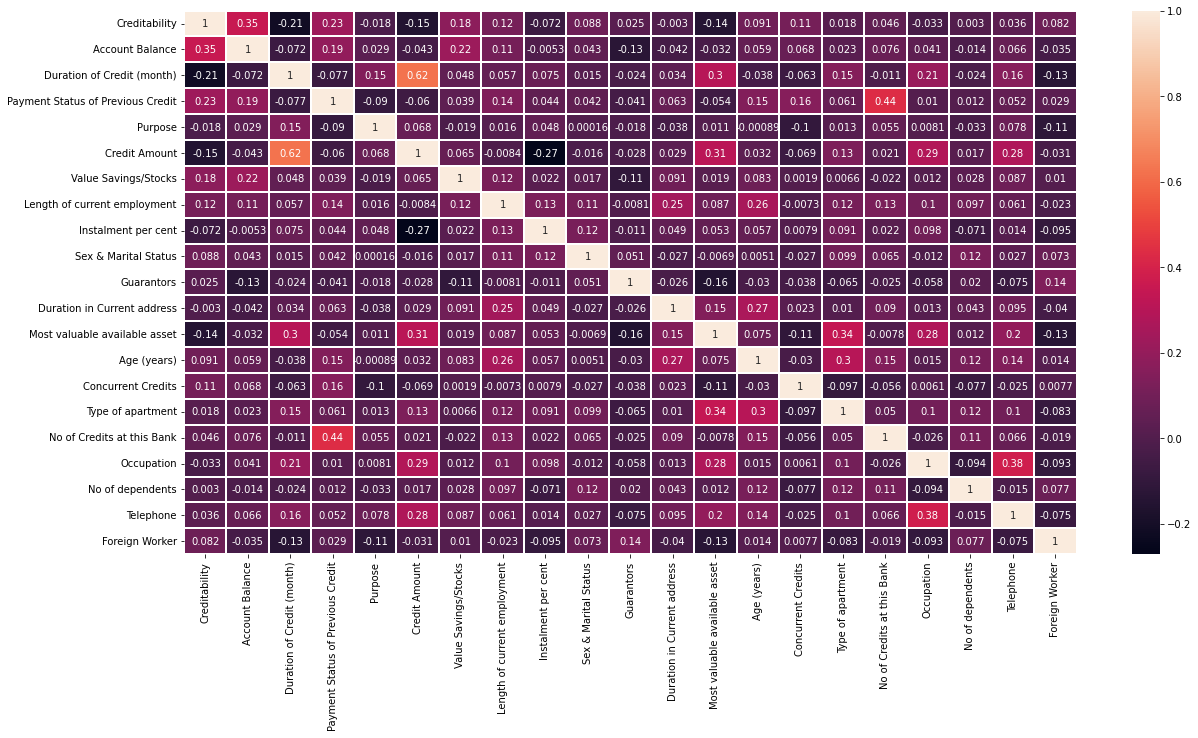

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True,linewidth=1, linecolor='w') #square=True
plt.show();

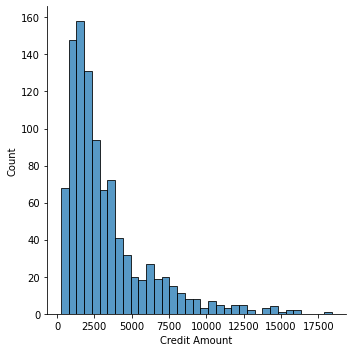

In [50]:
sns.displot(df['Credit Amount']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


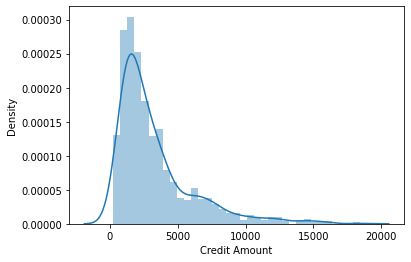

In [51]:
sns.distplot(df['Credit Amount']);

In [7]:
df['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

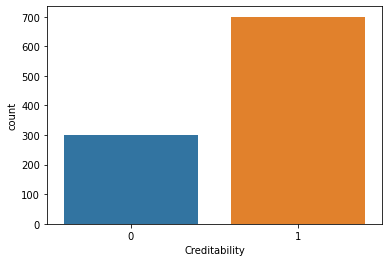

In [41]:
sns.countplot(x = df['Creditability']);

In [9]:
df['Account Balance'].value_counts()

4    394
1    274
2    269
3     63
Name: Account Balance, dtype: int64

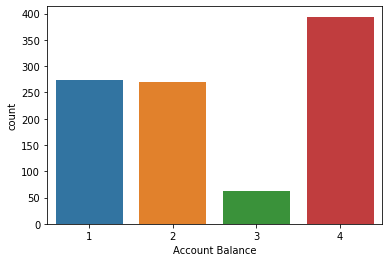

In [40]:
sns.countplot(x = df['Account Balance']);

In [11]:
df['Duration of Credit (month)'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: Duration of Credit (month), dtype: int64

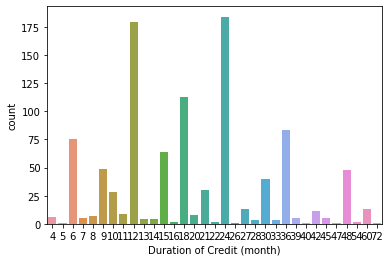

In [39]:
sns.countplot(x = df['Duration of Credit (month)']);

In [ ]:
df.columns

Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')

In [13]:
df['Payment Status of Previous Credit'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Payment Status of Previous Credit, dtype: int64

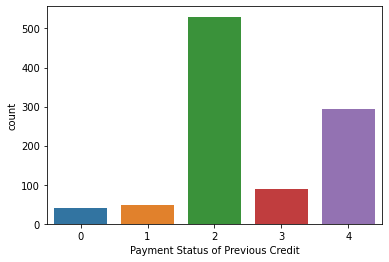

In [38]:
sns.countplot(x = df['Payment Status of Previous Credit']);

In [42]:
df['Purpose'].value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: Purpose, dtype: int64

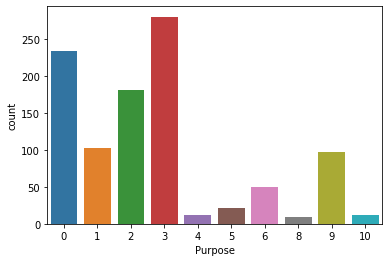

In [43]:
sns.countplot(x = df['Purpose']);

In [45]:
# df['Age (years)'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


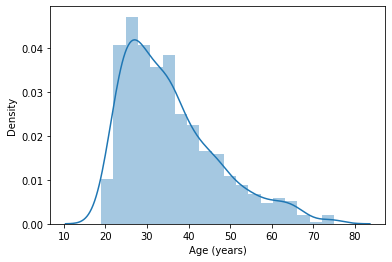

In [46]:
sns.distplot(df['Age (years)']);

In [ ]:
|

In [15]:
X = df.drop('Creditability', axis=1)
y = df['Creditability']

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800,)
(200,)


In [21]:
lr = LogisticRegression()
lr_model = lr.fit(X_train,y_train)
y_predict = lr_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
confusion_matrix(y_test, y_predict)

array([[ 22,  40],
       [ 13, 125]])

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      0.35      0.45        62
           1       0.76      0.91      0.83       138

    accuracy                           0.73       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.72      0.73      0.71       200



In [28]:
params = {"C": [1.0, 10.0, 100.0]}

# start = time.time()

gs = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=5000), 
                  params, 
                  n_jobs = -1, 
                  verbose = 1)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': [1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [29]:
bestParams = gs.best_estimator_.get_params()
bestParams

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
rbm = BernoulliRBM()
logistic = LogisticRegression(max_iter=10000)

pipe = Pipeline([("rbm", rbm), ("logistic", logistic)])

In [31]:
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])

params = {
    "rbm__learning_rate": [0.1, 0.01],
    "rbm__n_iter": [50,100],
    "rbm__n_components": [100,200],
    "logistic__C": [1.0,5.0]}

# perform a grid search over the parameter
gsc = GridSearchCV(classifier, params, n_jobs = -1, verbose = 1, cv=2)
gsc.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   22.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rbm',
                                        BernoulliRBM(batch_size=10,
                                                     learning_rate=0.1,
                                                     n_components=256,
                                                     n_iter=10,
                                                     random_state=None,
                                                     verbose=0)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                 

In [32]:
print ("RBM + Logistic Regression parameters",'\n')
bestParams = gsc.best_estimator_.get_params()
print('\n')
bestParams

RBM + Logistic Regression parameters 





{'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 10000,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False,
 'memory': None,
 'rbm': BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=50,
              random_state=None, verbose=0),
 'rbm__batch_size': 10,
 'rbm__learning_rate': 0.1,
 'rbm__n_comp

In [33]:
rbm = BernoulliRBM(n_components = 200, 
                   n_iter = 50, #recommended is 100, reducing to complete in time
                   learning_rate = 0.1,  
                   verbose = True)

logistic = LogisticRegression(C = 1.0, max_iter=10000)

# train the classifier and show an evaluation report
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
classifier.fit(X_train, y_train)

print (classification_report(y_test, classifier.predict(X_test)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -872.51, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -940.30, time = 0.06s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2090.49, time = 0.05s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1376.69, time = 0.06s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -3778.62, time = 0.06s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -4181.76, time = 0.06s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -4467.29, time = 0.05s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -5370.48, time = 0.06s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -4233.39, time = 0.06s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -9236.40, time = 0.06s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -7478.80, time = 0.05s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -7761.49, time = 0.05s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -10144.77, time = 0.06s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -8815.35, time = 0.06s
[B

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
rbm = BernoulliRBM(n_components = 200, 
                   n_iter = 50, #recommended is 100, reducing to complete in time
                   learning_rate = 0.1,  
                   verbose = True)

logistic = LogisticRegression(C = 1.0, max_iter=10000)

# train the classifier and show an evaluation report
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
classifier.fit(X_train, y_train)

print (classification_report(y_test, classifier.predict(X_test)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -437.71, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1402.23, time = 0.06s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1985.49, time = 0.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2647.94, time = 0.06s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1634.87, time = 0.06s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1675.68, time = 0.06s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -4244.28, time = 0.05s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -5679.56, time = 0.06s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -6536.22, time = 0.06s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -7658.61, time = 0.05s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -4122.81, time = 0.06s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -8045.23, time = 0.06s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -4872.59, time = 0.06s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -7594.08, time = 0.05s
[B

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
rbm = BernoulliRBM(n_components = 100, 
                   n_iter = 20, #recommended is 100, reducing to complete in time
                   learning_rate = 0.001,  
                   verbose = True)

logistic = LogisticRegression(C = 1.0, max_iter=100)

# train the classifier and show an evaluation report
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
classifier.fit(X_train, y_train)

print (classification_report(y_test, classifier.predict(X_test)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -3.99, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -3.66, time = 0.04s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -7.88, time = 0.04s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -9.45, time = 0.04s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -17.01, time = 0.04s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -20.38, time = 0.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.54, time = 0.04s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.75, time = 0.04s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -30.51, time = 0.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -19.66, time = 0.03s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.69, time = 0.04s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -31.12, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -60.92, time = 0.04s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -47.40, time = 0.03s
[BernoulliRBM] Iteration 15, pseu

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
rbm = BernoulliRBM(n_components = 200, 
                   n_iter = 50, #recommended is 100, reducing to complete in time
                   learning_rate = 0.1,  
                   verbose = True)

logistic = LogisticRegression(C = 1.0, max_iter=100)

# train the classifier and show an evaluation report
classifier = Pipeline([("logistic", logistic)])
classifier.fit(X_train, y_train)

print (classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.35      0.45        62
           1       0.76      0.91      0.83       138

    accuracy                           0.73       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.72      0.73      0.71       200



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [70]:
print(confusion_matrix(y_test, classifier.predict(X_test)))

[[ 22  40]
 [ 13 125]]


In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [65]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                Specs         Score
4                       Credit Amount  58264.415475
1          Duration of Credit (month)    321.030795
0                     Account Balance     75.474269
5                Value Savings/Stocks     37.937451
12                        Age (years)     30.178268
2   Payment Status of Previous Credit     24.103752
11      Most valuable available asset      9.503534
6        Length of current employment      5.799899
13                 Concurrent Credits      2.243436
7                 Instalment per cent      2.204619


In [66]:
features = ['Credit Amount','Duration of Credit (month)','Account Balance','Value Savings/Stocks','Age (years)',
           'Payment Status of Previous Credit','Most valuable available asset','Length of current employment',
           'Concurrent Credits','Instalment per cent']

In [71]:
df1 = df[['Credit Amount','Duration of Credit (month)','Account Balance','Value Savings/Stocks','Age (years)',
           'Payment Status of Previous Credit','Most valuable available asset','Length of current employment',
           'Concurrent Credits','Instalment per cent','Creditability']]

In [72]:
df1.head()

,Credit Amount,Duration of Credit (month),Account Balance,Value Savings/Stocks,Age (years),Payment Status of Previous Credit,Most valuable available asset,Length of current employment,Concurrent Credits,Instalment per cent,Creditability
0,1049,18,1,1,21,4,2,2,3,4,1
1,2799,9,1,1,36,4,1,3,3,2,1
2,841,12,2,2,23,2,1,4,3,2,1
3,2122,12,1,1,39,4,1,3,3,3,1
4,2171,12,1,1,38,4,2,3,1,4,1


In [73]:
df.corr()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Creditability,1.000000,0.350847,-0.214927,0.228785,-0.017979,-0.154740,0.178943,0.116002,-0.072404,0.088184,0.025137,-0.002967,-0.142612,0.091272,0.109844,0.018119,0.045732,-0.032735,0.003015,0.036466,0.082079
Account Balance,0.350847,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,-0.014145,0.066296,-0.035187
Duration of Credit (month),-0.214927,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,-0.023834,0.164718,-0.134680
Payment Status of Previous Credit,0.228785,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,0.011550,0.052370,0.028554
Purpose,-0.017979,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,-0.032577,0.078371,-0.113244
Credit Amount,-0.154740,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,0.017144,0.277000,-0.030662
Value Savings/Stocks,0.178943,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,0.027514,0.087208,0.010450
Length of current employment,0.116002,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,0.097192,0.060518,-0.022845
Instalment per cent,-0.072404,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,-0.071207,0.014413,-0.094762
Sex & Marital Status,0.088184,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,0.122165,0.027275,0.073103


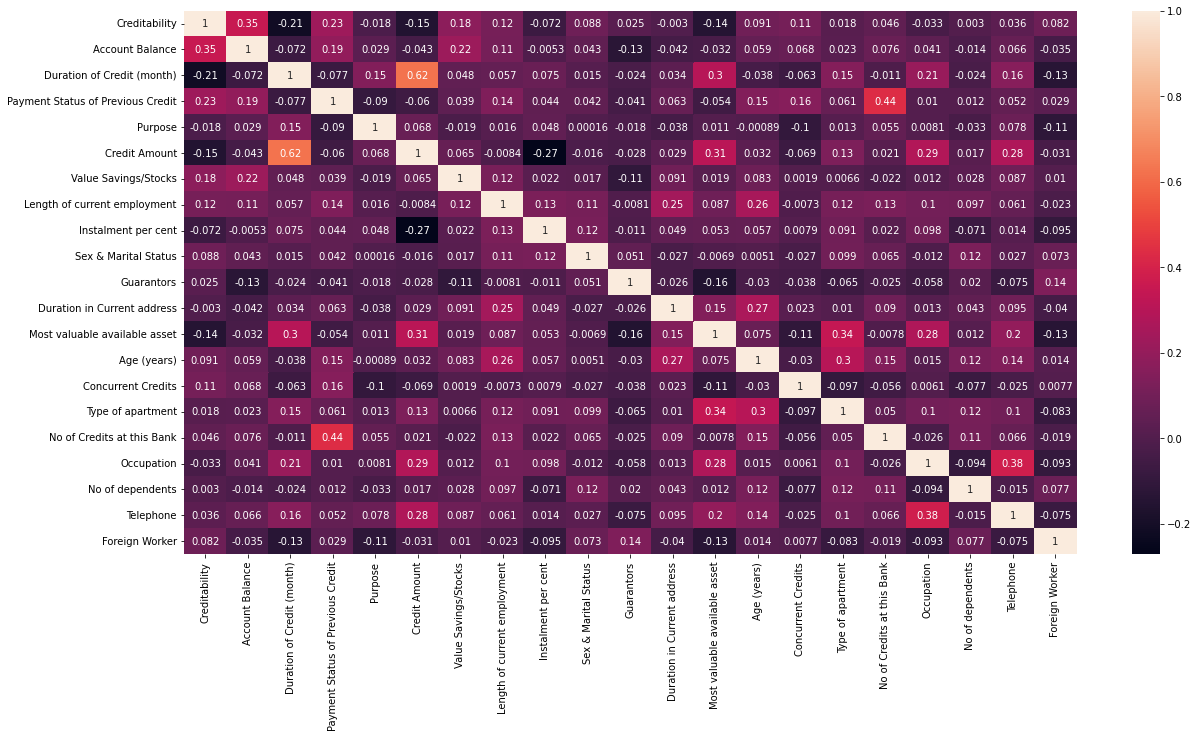

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [76]:
X1 = df1.drop('Creditability',axis=1)
y1 = df['Creditability']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
st = StandardScaler()


In [83]:
X_train_scaled = st.fit_transform(X_train)
X_test_scaled = st.fit_transform(X_test)

In [84]:
rbm = BernoulliRBM(n_components = 200, 
                   n_iter = 50, #recommended is 100, reducing to complete in time
                   learning_rate = 0.1,  
                   verbose = True)

logistic = LogisticRegression(C = 1.0, max_iter=10000)

# train the classifier and show an evaluation report
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
classifier.fit(X_train_scaled, y_train)

print (classification_report(y_test, classifier.predict(X_test_scaled)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -212.07, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -553.92, time = 0.06s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -931.57, time = 0.06s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1086.09, time = 0.05s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1840.75, time = 0.05s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1889.12, time = 0.06s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2092.15, time = 0.05s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2314.94, time = 0.06s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2959.49, time = 0.06s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -3268.84, time = 0.07s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -3509.78, time = 0.05s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -3980.40, time = 0.06s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -4061.92, time = 0.06s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -5184.58, time = 0.05s
[Ber

In [85]:
print(confusion_matrix(y_test, classifier.predict(X_test_scaled)))

[[  2  60]
 [  2 136]]
